code from https://dacon.io/competitions/official/235877/codeshare/4711?page=1&dtype=recent

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import os

In [3]:
DATA_DIR = "/content/drive/MyDrive/Colab Notebooks/Dacon/abalone/data"
train = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
test = pd.read_csv(os.path.join(DATA_DIR, 'test.csv'))

In [4]:
submission = pd.read_csv(os.path.join(DATA_DIR, 'sample_submission.csv'))

In [5]:
def check_missing_value(df):
  missing_values = df.isnull().sum().sort_values(ascending=False)
  missing_percentage = (missing_values / len(df)) * 100
  result = pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing values', '% Missing'])
  display(result)
check_missing_value(train)

,Missing values,% Missing
id,0,0.0
Gender,0,0.0
Lenght,0,0.0
Diameter,0,0.0
Height,0,0.0
Whole Weight,0,0.0
Shucked Weight,0,0.0
Viscra Weight,0,0.0
Shell Weight,0,0.0
Target,0,0.0


In [6]:
# from sklearn.preprocessing import LabelEncoder

In [7]:
# encoder = LabelEncoder()
# train["Gender"] = encoder.fit_transform(train['Gender'])

In [8]:
# test["Gender"] = encoder.transform(test['Gender'])

In [9]:
# keys = encoder.classes_
# values = encoder.transform(keys)
# labels = dict(zip(keys, values))
# labels

In [10]:
# train_X = train.drop(['id', 'Target'], axis=1)
# train_y = train["Target"]

In [11]:
train[train['Target'] > 20]

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
216,217,M,0.675,0.555,0.200,1.4385,0.5450,0.2665,0.465,21
448,449,F,0.680,0.550,0.200,1.5960,0.5250,0.4075,0.585,21
553,554,F,0.450,0.380,0.165,0.8165,0.2500,0.1915,0.265,23
629,630,M,0.655,0.540,0.215,1.8440,0.7425,0.3270,0.585,22
735,736,F,0.640,0.525,0.215,1.7790,0.4535,0.2855,0.550,22
762,763,F,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.475,29
792,793,M,0.735,0.590,0.225,1.7560,0.6370,0.3405,0.580,21
1131,1132,F,0.550,0.415,0.135,0.7750,0.3020,0.1790,0.260,23
1140,1141,M,0.490,0.390,0.150,0.5730,0.2250,0.1240,0.170,21
1172,1173,F,0.665,0.500,0.175,1.7420,0.5950,0.3025,0.725,21


In [12]:
# 나이가 29세인 이상치 제거
train = train.drop(index=[762], axis=0)

In [13]:
# 전체 무게가 알맹이 무게 + 껍질 무게보다 작은 데이터 확인
train[train["Whole Weight"] < train["Shucked Weight"] + train["Shell Weight"]]

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
47,48,I,0.380,0.275,0.095,0.1375,0.0860,0.0585,0.0605,7
382,383,I,0.455,0.330,0.100,0.3720,0.3580,0.0775,0.1100,8
435,436,I,0.475,0.365,0.100,0.1315,0.2025,0.0875,0.1230,7
847,848,I,0.230,0.165,0.060,0.0515,0.0190,0.0145,0.0360,4
1078,1079,I,0.275,0.205,0.070,0.1055,0.4950,0.0190,0.0315,5


In [14]:
out_index = train[train["Whole Weight"] < train["Shucked Weight"] + train["Shell Weight"]].index

In [15]:
train = train.drop(index=out_index, axis=0)

In [16]:
# 내장 무게가 알맹이 무게보다 무거운 것도 제거
train[train["Shucked Weight"] < train["Viscra Weight"]]

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
465,466,M,0.415,0.315,0.125,0.388,0.068,0.09,0.125,12


In [17]:
train.drop(index=[465], inplace=True, axis=0)

In [18]:
# 전체 무게를 알맹이 무게 + 껍질 무게로 수정
train['Whole Weight'] = train['Shucked Weight'] + train['Shell Weight']

test['Whole Weight'] = test['Shucked Weight'] + test['Shell Weight']

In [19]:
train.head()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,M,0.605,0.470,0.115,0.7025,0.3925,0.2910,0.3100,15
1,2,I,0.430,0.315,0.095,0.2795,0.1750,0.0800,0.1045,8
2,3,I,0.580,0.490,0.195,0.9405,0.5305,0.2540,0.4100,18
3,4,M,0.535,0.405,0.175,0.8850,0.5480,0.3265,0.3370,13
4,5,I,0.310,0.235,0.090,0.0880,0.0480,0.0310,0.0400,6


In [20]:
import seaborn as sns

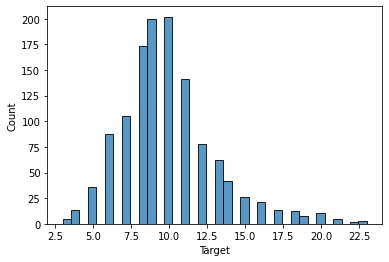

In [21]:
sns.histplot(train['Target'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


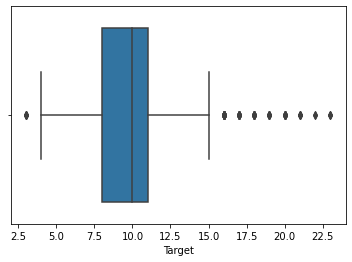

In [22]:
sns.boxplot(train['Target'])

Target이 15 이상인 데이터들이 부족한 것을 볼 수 있다.  
oversampling이 필요하다.  
단순하게 복제하는 방법과 SMOTE를 통해 sample의 수를 늘리는 방법이 있다.

In [23]:
train_T = train['Target']
target=[]
for i in range(len(train_T)):
  if train_T.iloc[i] < 10:
    target.append(1)
  elif train_T.iloc[i] < 15:
    target.append(2)
  else:
    target.append(3)

train['Range'] = target

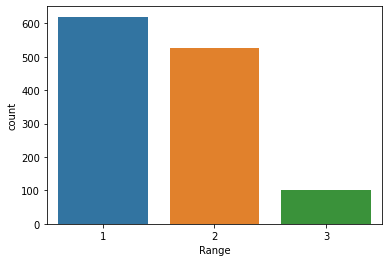

In [24]:
sns.countplot(x=train['Range'])

In [25]:
# 15 이상인 것들 두배로
train_3 = train[train['Range']==3]
train = train.append(train_3)

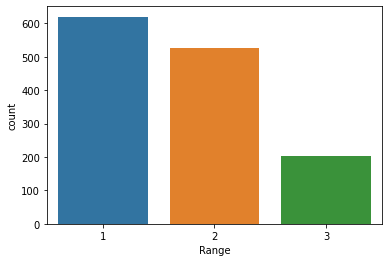

In [26]:
sns.countplot(x=train['Range'])

In [27]:
train.head()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target,Range
0,1,M,0.605,0.470,0.115,0.7025,0.3925,0.2910,0.3100,15,3
1,2,I,0.430,0.315,0.095,0.2795,0.1750,0.0800,0.1045,8,1
2,3,I,0.580,0.490,0.195,0.9405,0.5305,0.2540,0.4100,18,3
3,4,M,0.535,0.405,0.175,0.8850,0.5480,0.3265,0.3370,13,2
4,5,I,0.310,0.235,0.090,0.0880,0.0480,0.0310,0.0400,6,1


In [28]:
train = pd.get_dummies(train)

In [29]:
train.head()

,id,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target,Range,Gender_F,Gender_I,Gender_M
0,1,0.605,0.470,0.115,0.7025,0.3925,0.2910,0.3100,15,3,0,0,1
1,2,0.430,0.315,0.095,0.2795,0.1750,0.0800,0.1045,8,1,0,1,0
2,3,0.580,0.490,0.195,0.9405,0.5305,0.2540,0.4100,18,3,0,1,0
3,4,0.535,0.405,0.175,0.8850,0.5480,0.3265,0.3370,13,2,0,0,1
4,5,0.310,0.235,0.090,0.0880,0.0480,0.0310,0.0400,6,1,0,1,0


In [30]:
test = pd.get_dummies(test)

In [31]:
train.drop(['id'], inplace=True, axis=1)
test.drop(['id'], inplace=True, axis=1)

In [32]:
test.head()

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Gender_F,Gender_I,Gender_M
0,0.595,0.470,0.155,0.6065,0.4515,0.1780,0.1550,1,0,0
1,0.580,0.450,0.150,0.6360,0.2760,0.1815,0.3600,0,0,1
2,0.260,0.205,0.070,0.0720,0.0415,0.0190,0.0305,0,1,0
3,0.590,0.460,0.130,0.7850,0.4550,0.2055,0.3300,0,0,1
4,0.595,0.465,0.140,0.8225,0.5175,0.2440,0.3050,1,0,0


In [57]:
train_X = train.drop(['Target'], axis=1)
train_y = train['Target']

In [34]:
def NMAE(true, pred):
  score = np.mean(np.abs(true-pred)/true)
  return score

StratifiedKFold : 일반적인 kFold와는 달리 각 fold마다 target의 분포를 동일하게 해준다.  
  


In [35]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.2 MB/s 


In [36]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.utils import shuffle
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [50]:
train_y.head()

0    15
1     8
2    18
3    13
4     6
Name: Target, dtype: int64

In [58]:
data_train_X = train_X
data_train_y = train_y

In [60]:
skf = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True)
n = 0 

fold_target_pred = []

for train_index, valid_index in skf.split(data_train_X, data_train_X['Range']):
    n += 1
    
    val_pred_name = [] #validation pred model 이름 저장
    val_pred = []      #validation set pred 결과 저장
    target_pred = []   #test set pred 결과 저장
    
    train_X = np.array(data_train_X.drop("Range", axis = 1)) 
    train_Y = np.array(data_train_y)
    
    X_train, X_valid = train_X[train_index], train_X[valid_index]
    y_train, y_valid = train_Y[train_index], train_Y[valid_index]
    
    X_test = np.array(test)

    ### Create Model ###
    
    
    ### MLPRegressor ###
    model = MLPRegressor(random_state = 42, activation = 'tanh')
    model.fit(X_train, y_train) 
    
    val_pred_name.append("MLPRegressor")
    val_pred.append(model.predict(X_valid))
    target_pred.append(model.predict(X_test))
    
    
    ### XGBRegressor ###
    model = XGBRegressor(random_state = 42,)
    model.fit(X_train, y_train)
    
    val_pred_name.append("XGBRegressor")
    val_pred.append(model.predict(X_valid))
    target_pred.append(model.predict(X_test))
    
    ### CatBoostRegressor ###
    model = CatBoostRegressor(iterations = 1000, verbose = 0, task_type="GPU", random_state = 42)
    model.fit(X_train, y_train)
    
    val_pred_name.append("CatBoostRegressor")
    val_pred.append(model.predict(X_valid))
    target_pred.append(model.predict(X_test))
    
    ### voting ###
    
    ### average validation pred ###
    preds = np.array(val_pred[0])
    for i in range(1, len(val_pred)):
        preds += val_pred[i]
    
    preds = preds/len(val_pred)
    
    ### average target pred ###
    target_preds = np.array(target_pred[0])
    for i in range(1, len(target_pred)):
        target_preds += target_pred[i]
    
    target_preds = target_preds/len(target_pred)
    
    fold_target_pred.append(target_preds) # append final target pred
    
    print("========== fold %d ==========" %(n))
    for i in range(len(val_pred)):
        print("%s model NMAE : %0.4f" %(val_pred_name[i], NMAE(y_valid, val_pred[i].astype(int))))
        
    print("==============================")
    print("Average NMAE %0.4f" %(NMAE(y_valid, preds.astype(int))))
    print("")

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[05:47:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
========== fold 1 ==========
MLPRegressor model NMAE : 0.1905
XGBRegressor model NMAE : 0.1619
CatBoostRegressor model NMAE : 0.1559
Average NMAE 0.1627



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[05:47:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
========== fold 2 ==========
MLPRegressor model NMAE : 0.1777
XGBRegressor model NMAE : 0.1521
CatBoostRegressor model NMAE : 0.1464
Average NMAE 0.1460



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[05:47:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
========== fold 3 ==========
MLPRegressor model NMAE : 0.1750
XGBRegressor model NMAE : 0.1474
CatBoostRegressor model NMAE : 0.1421
Average NMAE 0.1447



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[05:47:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
========== fold 4 ==========
MLPRegressor model NMAE : 0.1933
XGBRegressor model NMAE : 0.1404
CatBoostRegressor model NMAE : 0.1462
Average NMAE 0.1472



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[05:48:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
========== fold 5 ==========
MLPRegressor model NMAE : 0.1684
XGBRegressor model NMAE : 0.1442
CatBoostRegressor model NMAE : 0.1440
Average NMAE 0.1471



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[05:48:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
========== fold 6 ==========
MLPRegressor model NMAE : 0.1731
XGBRegressor model NMAE : 0.1358
CatBoostRegressor model NMAE : 0.1309
Average NMAE 0.1301



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[05:48:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
========== fold 7 ==========
MLPRegressor model NMAE : 0.1875
XGBRegressor model NMAE : 0.1642
CatBoostRegressor model NMAE : 0.1456
Average NMAE 0.1581



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[05:48:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
========== fold 8 ==========
MLPRegressor model NMAE : 0.1997
XGBRegressor model NMAE : 0.1792
CatBoostRegressor model NMAE : 0.1752
Average NMAE 0.1748



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[05:48:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
========== fold 9 ==========
MLPRegressor model NMAE : 0.1643
XGBRegressor model NMAE : 0.1344
CatBoostRegressor model NMAE : 0.1371
Average NMAE 0.1347



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[05:49:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
========== fold 10 ==========
MLPRegressor model NMAE : 0.1872
XGBRegressor model NMAE : 0.1687
CatBoostRegressor model NMAE : 0.1648
Average NMAE 0.1587



In [61]:
np.array(fold_target_pred).shape

(10, 2924)

In [62]:
fold_target_pred

[array([ 9.40776538, 12.5288659 ,  5.66863608, ...,  9.35493045,
         8.60463121, 12.10174564]),
 array([ 9.29362158, 13.06003895,  5.68815113, ...,  9.45320378,
         8.6863993 , 11.88230982]),
 array([ 9.12178765, 12.73851736,  5.59729737, ...,  9.36814025,
         8.6243285 , 12.08643612]),
 array([ 9.54345242, 12.71941952,  5.67855298, ...,  9.5453529 ,
         8.53616839, 12.27871227]),
 array([ 9.62721233, 13.04957106,  5.73665109, ...,  9.48619096,
         8.63572952, 12.04016016]),
 array([ 9.24252316, 13.17949435,  5.75304722, ...,  9.35502669,
         8.72542762, 12.16453447]),
 array([ 9.63276958, 12.46794528,  5.64167033, ...,  9.36022444,
         8.74547419, 12.3502664 ]),
 array([ 9.05493865, 13.00448597,  5.72492755, ...,  9.27475538,
         8.88810162, 12.38831092]),
 array([ 9.56774521, 12.87796896,  5.71186669, ...,  9.64925094,
         8.85273039, 12.40196408]),
 array([ 9.52797326, 12.94199629,  5.65161769, ...,  9.41536072,
         8.76819138, 12.07

In [63]:
final_pred = np.array(fold_target_pred[0])
for i in range(1, len(fold_target_pred)):
  final_pred += fold_target_pred[i]

final_pred = final_pred/len(fold_target_pred)
final_pred = final_pred.astype(int)

In [64]:
final_pred.min()

3

In [65]:
submission['Target'] = final_pred

In [66]:
submission

,id,Target
0,1,9
1,2,12
2,3,5
3,4,11
4,5,10
...,...,...
2919,2920,4
2920,2921,7
2921,2922,9
2922,2923,8


In [67]:
submission.to_csv('submit5.csv', index=False)